# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [1]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# File to Load (Remember to change these)
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

### Merge the DataFrames

In [2]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [3]:
pyber_data_df.head(20)

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban
5,South Latoya,2019-03-11 12:26:48,9.52,1994999424437,10,Urban
6,New Paulville,2019-02-27 11:17:56,43.25,793208410091,44,Urban
7,Simpsonburgh,2019-04-26 00:43:24,35.98,111953927754,21,Urban
8,South Karenland,2019-01-08 03:28:48,35.09,7995623208694,4,Urban
9,North Jasmine,2019-03-09 06:26:29,42.81,5327642267789,33,Urban


## Deliverable 1: Get a Summary DataFrame 

In [4]:
#  1. Get the total rides for each city type
## Here, we refactored our code from 5.3.2 (2021) to apply to pyber_data_df.
pyber_rides = pyber_data_df.groupby(["type"]).count()["ride_id"]
pyber_rides.head()

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [5]:
# 2. Get the total drivers for each city type
## We refactored our code from 5.5.1 (2021) to find total drivers by city type.
## We use city_data_df instead of pyber_data_df because we do not want to count the
## same active driver more than once across intervals of time.
pyber_drivers = city_data_df.groupby(["type"]).sum()["driver_count"]
pyber_drivers

type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

In [6]:
#  3. Get the total amount of fares for each city type
## As in 2., we group by city type and sum up the fares per 5.5.1 (2021).
pyber_fares = pyber_data_df.groupby(["type"]).sum()["fare"]
pyber_fares

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [7]:
#  4. Get the average fare per ride for each city type. 
## Per the Module 5 Challenge (2021), we find the average fare per ride by
## dividing the fares for each city type by total rides for each city type.
pyber_average_fares = pyber_fares / pyber_rides
pyber_average_fares

type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
dtype: float64

In [8]:
# 5. Get the average fare per driver for each city type. 
## In a similar fashion to 4., we follow the Module 5 Challenge instructions (2021) and
## calculate the average fare per driver.
pyber_fares_per_driver = pyber_fares / pyber_drivers
pyber_fares_per_driver

type
Rural       55.486282
Suburban    39.502714
Urban       16.571468
dtype: float64

In [9]:
#  6. Create a PyBer summary DataFrame. 
## We design our code here in similar fashion to code in 4.11.4 (2021), where
## we created a DataFrame with multiple columns and rows.
pyber_summary = pd.DataFrame(
    {"Total Rides": pyber_rides,
    "Total Drivers": pyber_drivers,
    "Total Fares": pyber_fares,
    "Average Fare per Ride": pyber_average_fares,
    "Average Fare per Driver": pyber_fares_per_driver})
pyber_summary

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
type,,,,,
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [10]:
#  7. Cleaning up the DataFrame. Delete the index name
pyber_summary.index.name = None

In [11]:
#  8. Format the columns.
## We chained the map() and format functions like we did in 4.7.8 (2021) to 
## format the fare columns with a dollar sign and cents.
pyber_summary["Total Fares"] = pyber_summary["Total Fares"].map("${:.2f}".format)
pyber_summary["Average Fare per Ride"] = pyber_summary["Average Fare per Ride"].map("${:.2f}".format)
pyber_summary["Average Fare per Driver"] = pyber_summary["Average Fare per Driver"].map("${:.2f}".format)
pyber_summary

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,$4327.93,$34.62,$55.49
Suburban,625,490,$19356.33,$30.97,$39.50
Urban,1625,2405,$39854.38,$24.53,$16.57


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [12]:
# 1. Read the merged DataFrame
pyber_data_df.head(10)

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban
5,South Latoya,2019-03-11 12:26:48,9.52,1994999424437,10,Urban
6,New Paulville,2019-02-27 11:17:56,43.25,793208410091,44,Urban
7,Simpsonburgh,2019-04-26 00:43:24,35.98,111953927754,21,Urban
8,South Karenland,2019-01-08 03:28:48,35.09,7995623208694,4,Urban
9,North Jasmine,2019-03-09 06:26:29,42.81,5327642267789,33,Urban


In [13]:
# 2. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.
## As before, refactor our code from 5.5.1 (2021) to group by date and find sum fares.
## Per the advice of Zach (2020), we can group by two columns using a comma to separate
## each column's name within the groupby brackets.
pyber_modded = pd.DataFrame(pyber_data_df.groupby(["date","type"]).sum()["fare"])
pyber_modded

,,fare
date,type,
2019-01-01 00:08:16,Urban,37.91
2019-01-01 00:46:46,Suburban,47.74
2019-01-01 02:07:24,Suburban,24.07
2019-01-01 03:46:50,Urban,7.57
2019-01-01 05:23:21,Urban,10.75
...,...,...
2019-05-08 04:20:00,Urban,21.99
2019-05-08 04:39:49,Urban,18.45
2019-05-08 07:29:01,Urban,18.55


In [14]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
pyber_modded = pyber_modded.reset_index()
pyber_modded.head()

,date,type,fare
0,2019-01-01 00:08:16,Urban,37.91
1,2019-01-01 00:46:46,Suburban,47.74
2,2019-01-01 02:07:24,Suburban,24.07
3,2019-01-01 03:46:50,Urban,7.57
4,2019-01-01 05:23:21,Urban,10.75


In [15]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 
## We referred to the Pandas documentation for pandas.DataFrame.pivot (2021) for this code.
pyber_pivot_modded = pyber_modded.pivot(index='date', columns='type', values='fare')
pyber_pivot_modded

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
...,...,...,...
2019-05-08 04:20:00,NaN,NaN,21.99
2019-05-08 04:39:49,NaN,NaN,18.45
2019-05-08 07:29:01,NaN,NaN,18.55


In [16]:
# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.
## One way to do this with loc[] is to get the index values that span over the given dates,
## per PythonHow's sample code for "[e]xtracting a subset of a pandas dataframe" (2021).

In [17]:
## We know that "2019-01-01 00:08:16" will be the first entry in our new DataFrame.
## We want to find the last ride before 2019-04-29, so we use tail() on our pivot DataFrame.
## Per the Module 5 Challenge (2021), we will be looking at total weekly data, and since
## 2019-04-29 is on a Monday - the start of every new workweek, we won't count it in our data.
pyber_pivot_modded.tail(160)

type,Rural,Suburban,Urban
date,,,
2019-04-29 22:08:22,NaN,25.75,NaN
2019-04-29 23:05:04,NaN,NaN,14.59
2019-04-29 23:10:18,NaN,29.39,NaN
2019-04-30 00:42:10,NaN,NaN,36.07
2019-04-30 01:50:44,50.81,NaN,NaN
...,...,...,...
2019-05-08 04:20:00,NaN,NaN,21.99
2019-05-08 04:39:49,NaN,NaN,18.45
2019-05-08 07:29:01,NaN,NaN,18.55


In [18]:
## Now that we found our last ride on 2019-04-29 with some trial and error, 
## we have two index values we can input into our loc[] function per PythonHow's advice (2021).
pyber_loc_modded = pyber_pivot_modded.loc["2019-01-01 00:08:16":"2019-04-29 23:10:18"]
pyber_loc_modded

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
...,...,...,...
2019-04-29 20:54:19,NaN,NaN,28.41
2019-04-29 21:20:41,NaN,NaN,13.59
2019-04-29 22:08:22,NaN,25.75,NaN


In [19]:
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
pyber_loc_modded.index = pd.to_datetime(pyber_loc_modded.index)
pyber_loc_modded

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
...,...,...,...
2019-04-29 20:54:19,NaN,NaN,28.41
2019-04-29 21:20:41,NaN,NaN,13.59
2019-04-29 22:08:22,NaN,25.75,NaN


In [20]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
## Following the steps outlined in the Module 5 Challenge (2021), we arrive at a
## new DataFrame with weekly sum data for fares.
pyber_resample_modded = pyber_loc_modded.resample("W").sum()
pyber_resample_modded

type,Rural,Suburban,Urban
date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94
2019-02-10,115.80,974.34,2162.64
2019-02-17,95.82,1045.50,2235.07
2019-02-24,419.06,1412.74,2466.29
2019-03-03,175.14,858.46,2218.20


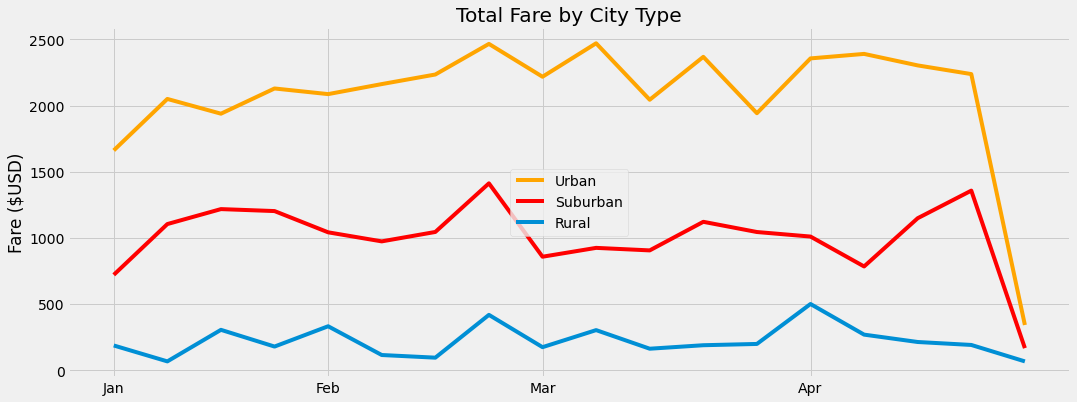

In [21]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 

# Import the style from Matplotlib.
from matplotlib import style
# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')
## For creating and annotating our graph, we refer to 5.1.3 (2021), 5.1.4 (2021),
## 5.1.10 (2021), and examples in 5.4.4 (2021).

# We use the figsize parameter in subplots to customize our plot's size.
fig, ax = plt.subplots(figsize=(16, 6))
## We can define our x-axis values with a list of each value.
x_axis = ["2019-01-06", "2019-01-13", "2019-01-20", "2019-01-27", "2019-02-03", 
          "2019-02-10", "2019-02-17", "2019-02-24", "2019-03-03", "2019-03-10", 
          "2019-03-17", "2019-03-24", "2019-03-31", "2019-04-07", "2019-04-14", 
          "2019-04-21", "2019-04-28", "2019-05-05"]
## Following the examples in the Matplotlibs documentation for xticks (2021), we assign
## tick values of months to the corresponding index numbers that indicate dates.
## Moreover, we pick index numbers 0, 4, 8, and 13 to match the expected output graph in
## the Module 5 Challenge (2021).
ax.set_title('Total Fare by City Type')
ax.set_ylabel('Fare ($USD)')
plt.xticks([0, 4, 8, 13], 
           ['Jan', 'Feb', 'Mar', 'Apr'])
## We use plt.plot() three times, assigning x_axis as the x-axis for each one and data for the
## corresponding city type as our y-axis values. Additionally, we label and color each plot 
## accordingly to generate a legend and match the expected output graph ("Module 5 Challenge", 2021).
urban = plt.plot(x_axis, pyber_resample_modded["Urban"], label="Urban", c="orange")
suburban = plt.plot(x_axis, pyber_resample_modded["Suburban"], label="Suburban", c="red")
rural = plt.plot(x_axis, pyber_resample_modded["Rural"], label="Rural")
## 
plt.legend()
plt.savefig("analysis/PyBer_fare_summary.png")
plt.show()
